In [1]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls

'att_faces (1).zip'   att_faces.zip   extracted/   sample_data/


In [2]:
from google.colab import files
import zipfile
# Upload your zip file
uploaded = files.upload()

# Specify the uploaded file name
zip_file_name = list(uploaded.keys())[0]

# Specify the extraction path
extracted_path = '/content/extracted/'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

Saving att_faces.zip to att_faces (1).zip


In [3]:
# Data Preparation in the matrix format of (400X10304)
image_dir = 'extracted/'
faces = []
for i in os.listdir(image_dir):
  image_path = os.path.join(image_dir,i)
  for j in os.listdir(image_path):
    images_path = os.path.join(image_path,j)
    image = cv2.imread(images_path,0)
    img = image.reshape(1,-1)
    faces.extend(img)

faces_array = np.array(faces)
faces_array.shape


(400, 10304)

In [5]:

mean_face = np.mean(faces_array,axis=0)
mean_face.shape

(10304,)

(10304,)
(112, 92)


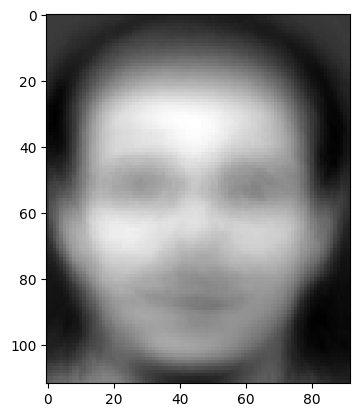

In [106]:
# Mean face
mean_image = mean_face.reshape(112,-1)
print(mean_face.shape)
print(mean_image.shape)
plt.imshow(mean_image,cmap=plt.cm.gray)

In [105]:
# Adjusting each data with mean
var_faces = faces_array-mean_face
var_faces.shape
a = [[1,2,3],[3,4,5],[2,6,5]]
b = [[2,3,9],[4,5,8],[6,6,7],[7,8,7]]
c=np.dot(b,a)
c[2:]

array([[38, 78, 83],
       [45, 88, 96]])

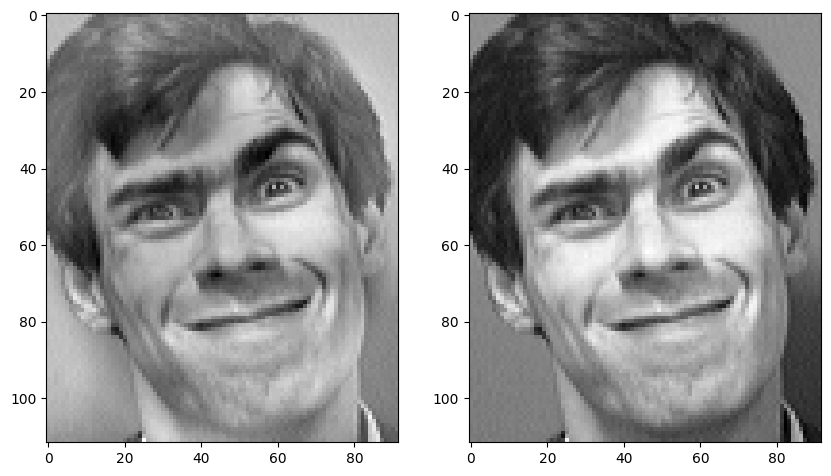

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))
ax[0].imshow(var_faces[0].reshape(112,-1),cmap="gray")
ax[1].imshow(faces_array[0].reshape(112,-1),cmap="gray")

In [21]:
cov_faces = np.cov(var_faces,rowvar=False)

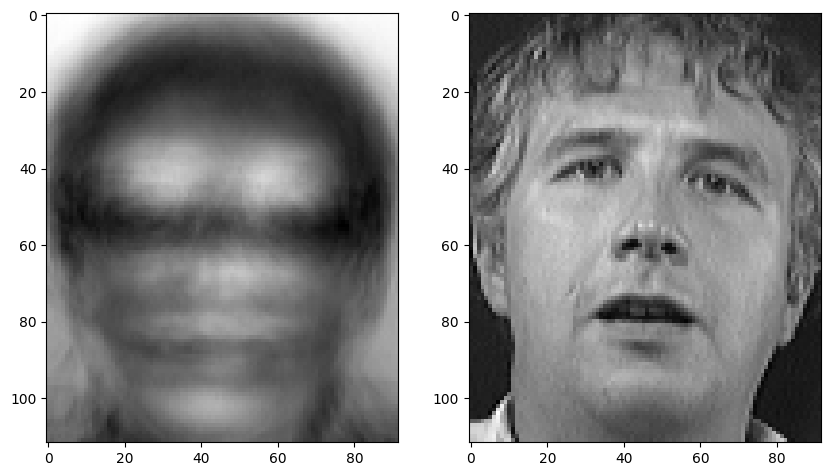

In [96]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))
ax[0].imshow(cov_faces[10].reshape(112,-1),cmap=plt.cm.gray)
ax[1].imshow(faces_array[10].reshape(112,-1),cmap=plt.cm.gray)

In [92]:
def PCA(images,no_of_components):
  n_samples,n_features = images.shape
  mean = np.mean(images,axis=0)
  var = images - mean
  U,S,V = np.linalg.svd(var)
  print(V.shape)
  eigen_vec = V[:no_of_components]
  return eigen_vec,mean,var

In [100]:
no_of_components = 5
eigen_vector,mean,var = PCA(faces_array,no_of_components)
print(eigen_vector.shape)
print(var.shape)


(10304, 10304)
(5, 10304)
(400, 10304)


In [102]:
eigen_vector.T.shape

(10304, 5)

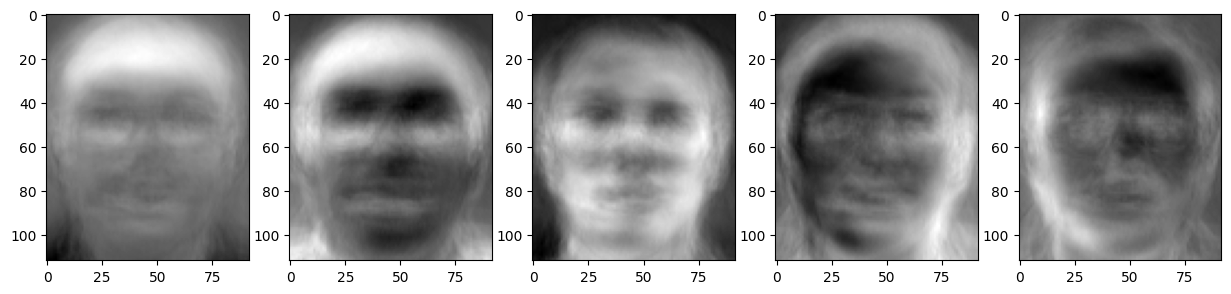

In [89]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(10,8))
plt.subplots_adjust(right=1.3)
for i in range(no_of_components):

  ax[i].imshow(eigen_vector[i].reshape(112,-1),cmap=plt.cm.gray)


In [66]:
def face_reconstruction(var,eigen_vector,mean_face,index):
  # need to add the weighted eigen vector and mean to reconstruct
  weights = np.dot(var,eigen_vector.T)

  weighted_eigen_vector = np.dot(weights[index:],eigen_vector)
  reconstructed_image = (mean_face + weighted_eigen_vector)
  return reconstructed_image

In [67]:
reconstructed_image = face_reconstruction(var,eigen_vector,mean,10)
reconstructed_image[0].shape

(10304,)

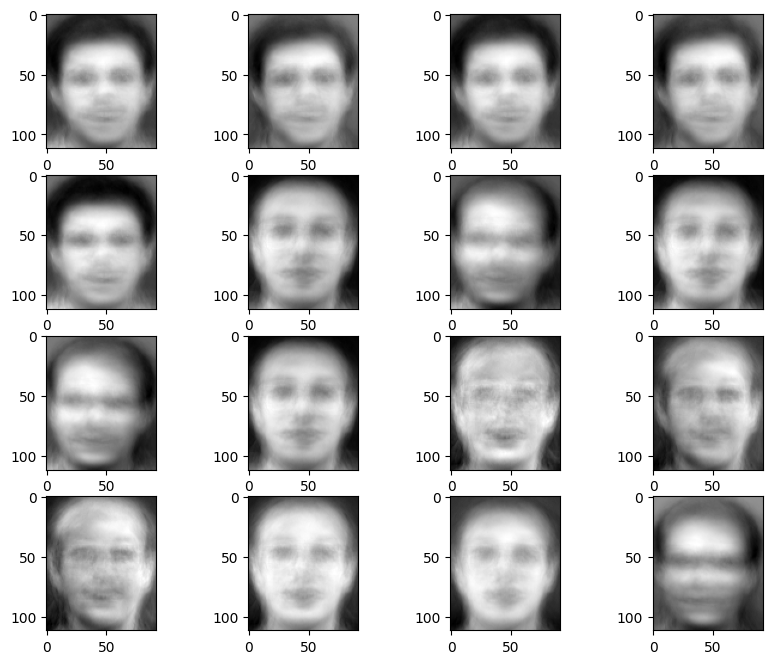

In [80]:
# Reconstruction using 5 Componenets
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(10,8))
for i in range(16):
  reconstructed_image = face_reconstruction(var,eigen_vector,mean,i)
  ax[i // 4, i % 4].imshow(reconstructed_image[i].reshape(112,-1),cmap=plt.cm.gray)

In [81]:
# Reconstruction using 10 components
no_of_components = 10
eigen_vector,mean,var = PCA(faces_array,no_of_components)
eigen_vector.shape

(10, 10304)

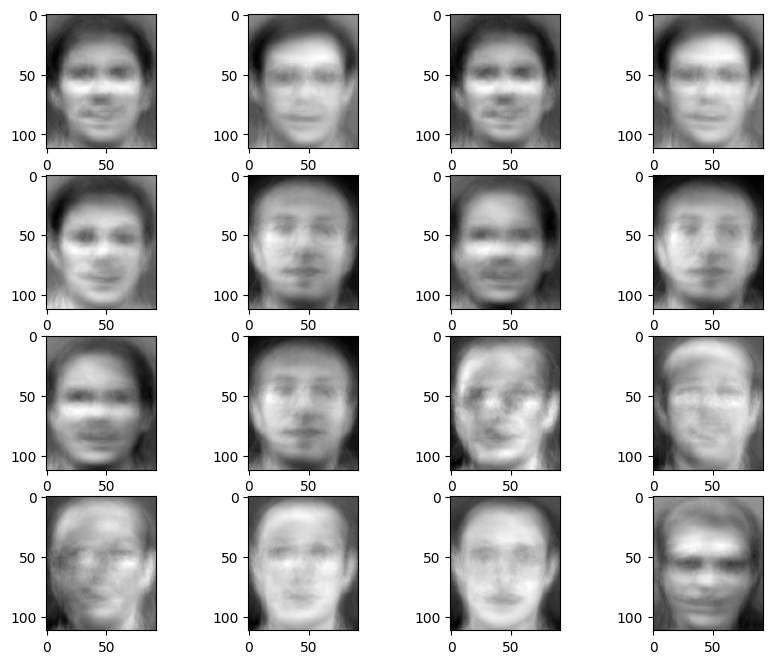

In [82]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(10,8))
for i in range(16):
  reconstructed_image = face_reconstruction(var,eigen_vector,mean,i)
  ax[i // 4, i % 4].imshow(reconstructed_image[i].reshape(112,-1),cmap=plt.cm.gray)

In [83]:
# Reconstruction using 50 Components
no_of_components = 50
eigen_vector,mean,var = PCA(faces_array,no_of_components)
eigen_vector.shape

(50, 10304)

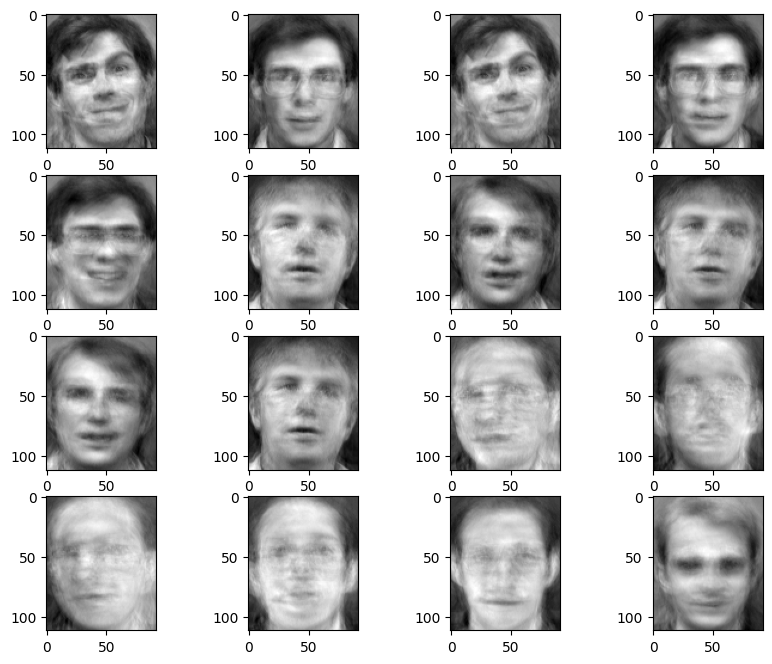

In [84]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(10,8))
for i in range(16):
  reconstructed_image = face_reconstruction(var,eigen_vector,mean,i)
  ax[i // 4, i % 4].imshow(reconstructed_image[i].reshape(112,-1),cmap=plt.cm.gray)

In [90]:
# Reconstruction using 50 Components
no_of_components = 100
eigen_vector,mean,var = PCA(faces_array,no_of_components)
eigen_vector.shape

(100, 10304)

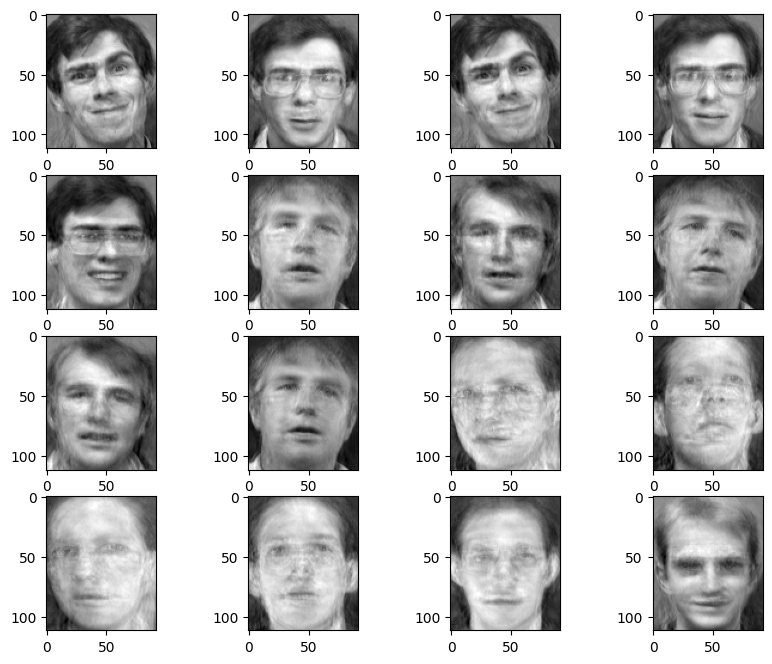

In [91]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(10,8))
for i in range(16):
  reconstructed_image = face_reconstruction(var,eigen_vector,mean,i)
  ax[i // 4, i % 4].imshow(reconstructed_image[i].reshape(112,-1),cmap=plt.cm.gray)